In [103]:
import pandas as pd
df=pd.read_csv('datos.csv')
DFF=pd.DataFrame(df)
DFF

,tipo,ubicacion,tamano,rendimiento,fertilizante
0,Kumato,Níjar,8559,3.864283,abono orgánico
1,Raf,Níjar,5280,4.018808,abono orgánico
2,Cherry,Almería,1823,1.482396,NPK
3,Cherry,Roquetas de Mar,2769,3.050384,abono orgánico
4,Kumato,Adra,3570,4.934876,abono granulado
...,...,...,...,...,...
4995,Pera,Almería,6370,4.408113,abono orgánico
4996,Kumato,Níjar,5560,2.576285,NPK
4997,Corazón de buey,Adra,8782,4.891434,abono orgánico
4998,Pera,Adra,8954,2.621669,NPK


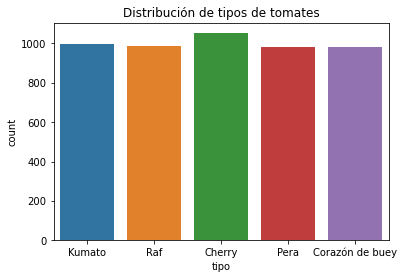

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=DFF, x='tipo')
plt.title('Distribución de tipos de tomates')
plt.show()

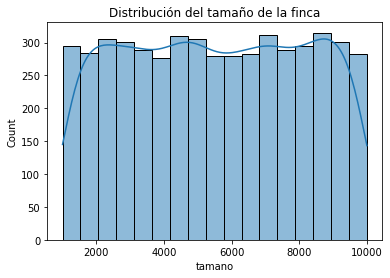

In [105]:
# Distribución del tamaño de la finca
sns.histplot(data=DFF, x='tamano', kde=True)
plt.title('Distribución del tamaño de la finca')
plt.show()


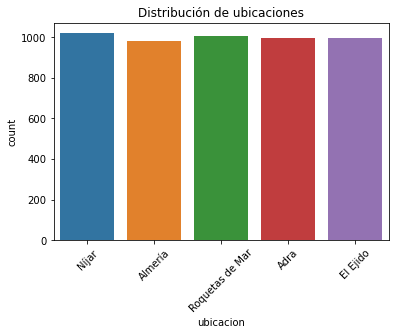

In [106]:
# Distribución de ubicaciones
sns.countplot(data=DFF, x='ubicacion')
plt.title('Distribución de ubicaciones')
plt.xticks(rotation=45)
plt.show()

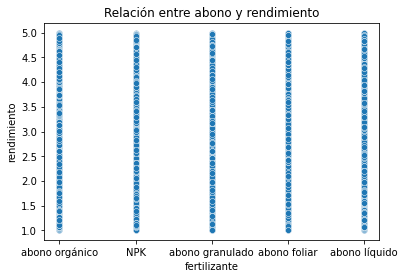

In [107]:
# Gráfico de dispersión entre abono y rendimiento
sns.scatterplot(data=DFF, x='fertilizante', y='rendimiento')
plt.title('Relación entre abono y rendimiento')
plt.show()

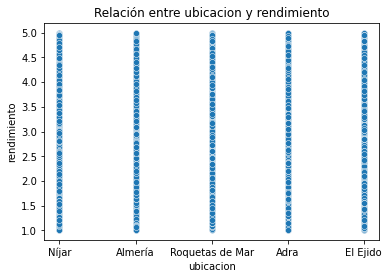

In [108]:
# Gráfico de dispersión entre abono y rendimiento
sns.scatterplot(data=DFF, x='ubicacion', y='rendimiento')
plt.title('Relación entre ubicacion y rendimiento')
plt.show()

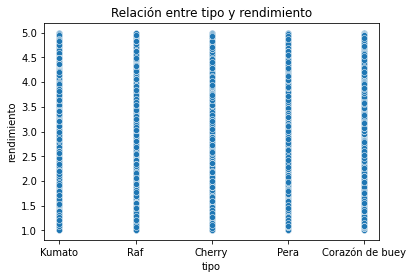

In [109]:
# Gráfico de dispersión entre abono y rendimiento
sns.scatterplot(data=DFF, x='tipo', y='rendimiento')
plt.title('Relación entre tipo y rendimiento')
plt.show()

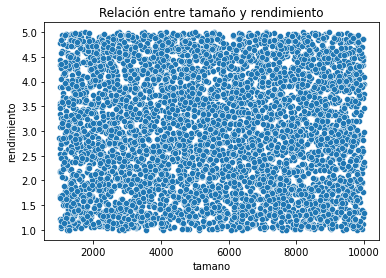

In [110]:
# Gráfico de dispersión entre abono y rendimiento
sns.scatterplot(data=DFF, x='tamano', y='rendimiento')
plt.title('Relación entre tamaño y rendimiento')
plt.show()

In [111]:
#Conversion de datos string a float
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
DFF['tipo'] = label_encoder.fit_transform(DFF['tipo'])
DFF['ubicacion'] = label_encoder.fit_transform(DFF['ubicacion'])
DFF['fertilizante'] = label_encoder.fit_transform(DFF['fertilizante'])

DFF


,tipo,ubicacion,tamano,rendimiento,fertilizante
0,2,3,8559,3.864283,4
1,4,3,5280,4.018808,4
2,0,1,1823,1.482396,0
3,0,4,2769,3.050384,4
4,2,0,3570,4.934876,2
...,...,...,...,...,...
4995,3,1,6370,4.408113,4
4996,2,3,5560,2.576285,0
4997,1,0,8782,4.891434,4
4998,3,0,8954,2.621669,0


In [119]:
#Diccionarios para guardar los cambios realizados string -> float
cambios_tipo={'Cherry':0, 'Raf':4, 'Kumato':2, 'Pera':3, 'Corazon de buey':1}
cambios_ubi={'Almeria':1, 'El Ejido':2, 'Roquetas de Mar':4, 'Adra':0, 'Nijar':3}
camibos_fert={'NPK':0, 'abono organico':4, 'abono foliar':1, 'abono liquido':3, 'abono granulado':2}
cambioss={'Cherry':0, 'Raf':4, 'Kumato':2, 'Pera':3, 'Corazon de buey':1,'Almeria':1, 'El Ejido':2, 'Roquetas de Mar':4, 'Adra':0, 'Nijar':3,'NPK':0, 'abono organico':4, 'abono foliar':1, 'abono liquido':3, 'abono granulado':2}

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = DFF.drop('rendimiento', axis=1)
y = DFF['rendimiento']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Procesamiento y normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [114]:
# Crear una instancia del modelo de árbol de decisión CART
model = DecisionTreeRegressor()

# Entrenar el modelo con los datos normalizados
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)

Error cuadrático medio (MSE): 2.7712943234530147


In [127]:
#Utilizar el modelo seleccionado para realizar predicciones sobre el rendimiento del cultivo en una finca específica,
# utilizando los datos disponibles sobre el tipo de cultivo, la ubicación geográfica, el tamaño de la finca y el uso de fertilizantes.
# Preparar los datos de entrada para la predicción
datos_prediccion = {
    'tipo': 'Cherry',
    'ubicacion': 'Adra',
    'tamano_finca': 1823,
    'uso_fertilizantes': 'NPK'
}
data_prediccion = pd.DataFrame({
    'tipo': [0],
    'ubicacion': [0],
    'tamano': [1823],
    'fertilizante': [0]
})

# Utilizar el modelo seleccionado para realizar la predicción
rendimiento_predicho = model.predict(data_prediccion)
#Rendimiento esperado: 1.482396452057785
print("Rendimiento predicho:", rendimiento_predicho)


Rendimiento predicho: [2.32875367]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [141]:
#Utilizar el modelo para identificar los principales factores 
#que influyen en el rendimiento del cultivo y proporcionar recomendaciones para mejorar el rendimiento en el sector de la agricultura.
importancia_caracteristicas = model.feature_importances_
indices_ordenados = importancia_caracteristicas.argsort()[::-1]
caracteristicas_ordenadas = [importancia_caracteristicas[i] for i in indices_ordenados]
print(indices_ordenados)
print(caracteristicas_ordenadas)
print("Esto significa, que lo más importante según estos datos es el tamaño por bastante diferencia, el resto similar aunque el fertilizante apenas es importante")

[2 1 0 3]
[0.6605239107926946, 0.13512664375782668, 0.1292156313628092, 0.07513381408666957]
Esto significa, que lo más importante según estos datos es el tamaño por bastante diferencia, el resto similar aunque el fertilizante apenas es importante


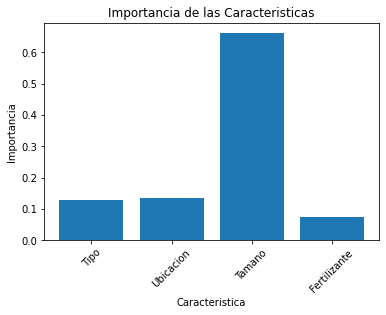

In [139]:
# Supongamos que tienes los siguientes datos de importancia de características
caracteristicas = ['Tipo', 'Ubicacion', 'Tamano', 'Fertilizante']
importancia = [0.1292156313628092, 0.13512664375782668, 0.6605239107926946, 0.07513381408666957]
# Crear un DataFrame para visualizar la importancia de las características
df_importancia = pd.DataFrame({'Caracteristica': caracteristicas, 'Importancia': importancia})

# Graficar la importancia de las características en un gráfico de barras
plt.bar(df_importancia['Caracteristica'], df_importancia['Importancia'])
plt.xlabel('Caracteristica')
plt.ylabel('Importancia')
plt.title('Importancia de las Caracteristicas')
plt.xticks(rotation=45)
plt.show()


In [140]:
#RECOMENDACIONES: A más tamaño mas calidad.